<a href="https://colab.research.google.com/github/TiagoHarari/DataAnalysis_course/blob/main/5-DataViz_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/5_Visualizacion/ejercicio/ejercicio.ipynb)

# Ejercicios Visualización

Se pedirá realizar graficos con distintos dataset. Es importante que cada uno de ellos cuente con un título y los respectivos nombres en sus ejes.


## 1. Serie de tiempo

Se pide realizar un análisis exploratorio de una serie de datos macroeconomicos, para ello es necesario visualizar la serie y otros gráficos descriptivos de la misma que se indicarán a continuación.

In [54]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/5_Visualizacion/ejercicios/data_macro.csv', sep=',', index_col=0)

In [56]:
df.head()

,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,2004,I,475.774,76.726,110.908,301.075,52.471
1,2004,II,469.984,80.629,114.546,305.247,52.962
2,2004,III,493.773,82.344,117.306,317.382,54.495
3,2004,IV,500.929,87.173,119.994,324.624,55.747
4,2005,I,515.446,89.021,128.989,321.890,57.651


In [57]:
df1 = df.drop(columns=["Trimestre"])
df1.head()

,Año,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,2004,475.774,76.726,110.908,301.075,52.471
1,2004,469.984,80.629,114.546,305.247,52.962
2,2004,493.773,82.344,117.306,317.382,54.495
3,2004,500.929,87.173,119.994,324.624,55.747
4,2005,515.446,89.021,128.989,321.890,57.651


nuevo df que elimina a trimestre, porque es un tipo de dato no numerico que nos jode

In [58]:
# minimos y maximos para cada anio
df1.groupby('Año').transform(lambda x: (x.max() - x.min()))

,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,30.945,10.447,9.086,23.549,3.276
1,30.945,10.447,9.086,23.549,3.276
2,30.945,10.447,9.086,23.549,3.276
3,30.945,10.447,9.086,23.549,3.276
4,24.949,9.352,4.180,22.024,3.024
...,...,...,...,...,...
59,45.644,53.600,21.767,59.112,2.625
60,6.945,13.496,8.996,3.924,4.075
61,6.945,13.496,8.996,3.924,4.075
62,6.945,13.496,8.996,3.924,4.075


In [59]:
# tomamos 1 por año (de a 4 filas = 1 anio)
df1.groupby('Año').transform(lambda x: (x.max() - x.min())).iloc[::4]

,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,30.945,10.447,9.086,23.549,3.276
4,24.949,9.352,4.180,22.024,3.024
8,34.558,9.371,8.243,27.603,2.459
12,39.587,16.742,16.086,27.895,2.314
16,30.245,21.036,26.435,11.232,1.928
20,34.905,18.936,15.825,31.874,5.816
24,40.841,33.407,20.604,40.369,4.534
28,12.848,17.100,7.659,20.071,2.114
32,33.871,18.456,23.489,24.668,2.478
36,9.609,8.110,15.112,19.110,2.959


### 1.1
Graficar la serie de importaciones, en el eje de las abscisas deben ir los años, mientras que en el de las ordenadas la cantidad importada.

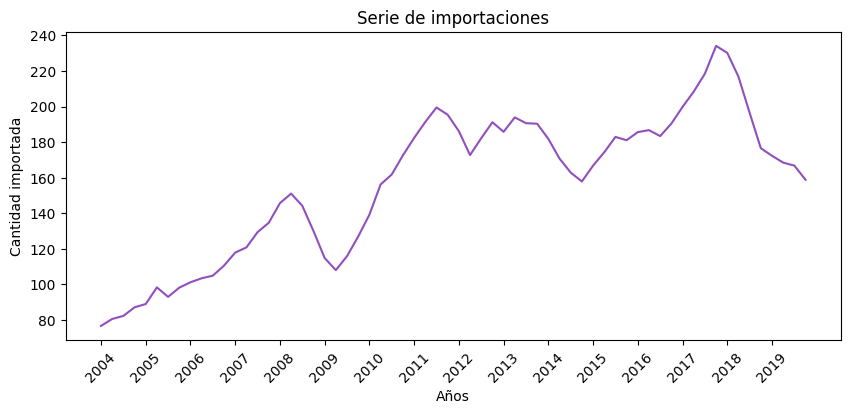

In [60]:
# seleccionamos la columna correspondiente al analisis
importaciones = df1["Importaciones_D"]

# configuramos grafico
imp_plot = importaciones.plot.line(figsize=(10,4), color='#914fbe')
años = df1['Año'].unique()
plt.xticks(range(0, len(años)*4, 4), años, rotation=45) #eje x, van los anios


imp_plot.set_title("Serie de importaciones")
imp_plot.set_xlabel("Años")
imp_plot.set_ylabel("Cantidad importada")

plt.show()

### 1.2

Graficar los cierres anuales para exportaciones, importaciones, consumo publico, consumo privado y PBI. Recuerde incorporar los años en el eje horizontal.

In [61]:
df.columns

Index(['Año', 'Trimestre', 'PIB_D', 'Importaciones_D', 'Exportaciones_D',
       'Consumo_Privado_D', 'Consumo_Publico_D'],
      dtype='object')

In [62]:
df["Año"].unique().shape[0]

16

In [63]:
df.head()

,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,2004,I,475.774,76.726,110.908,301.075,52.471
1,2004,II,469.984,80.629,114.546,305.247,52.962
2,2004,III,493.773,82.344,117.306,317.382,54.495
3,2004,IV,500.929,87.173,119.994,324.624,55.747
4,2005,I,515.446,89.021,128.989,321.890,57.651


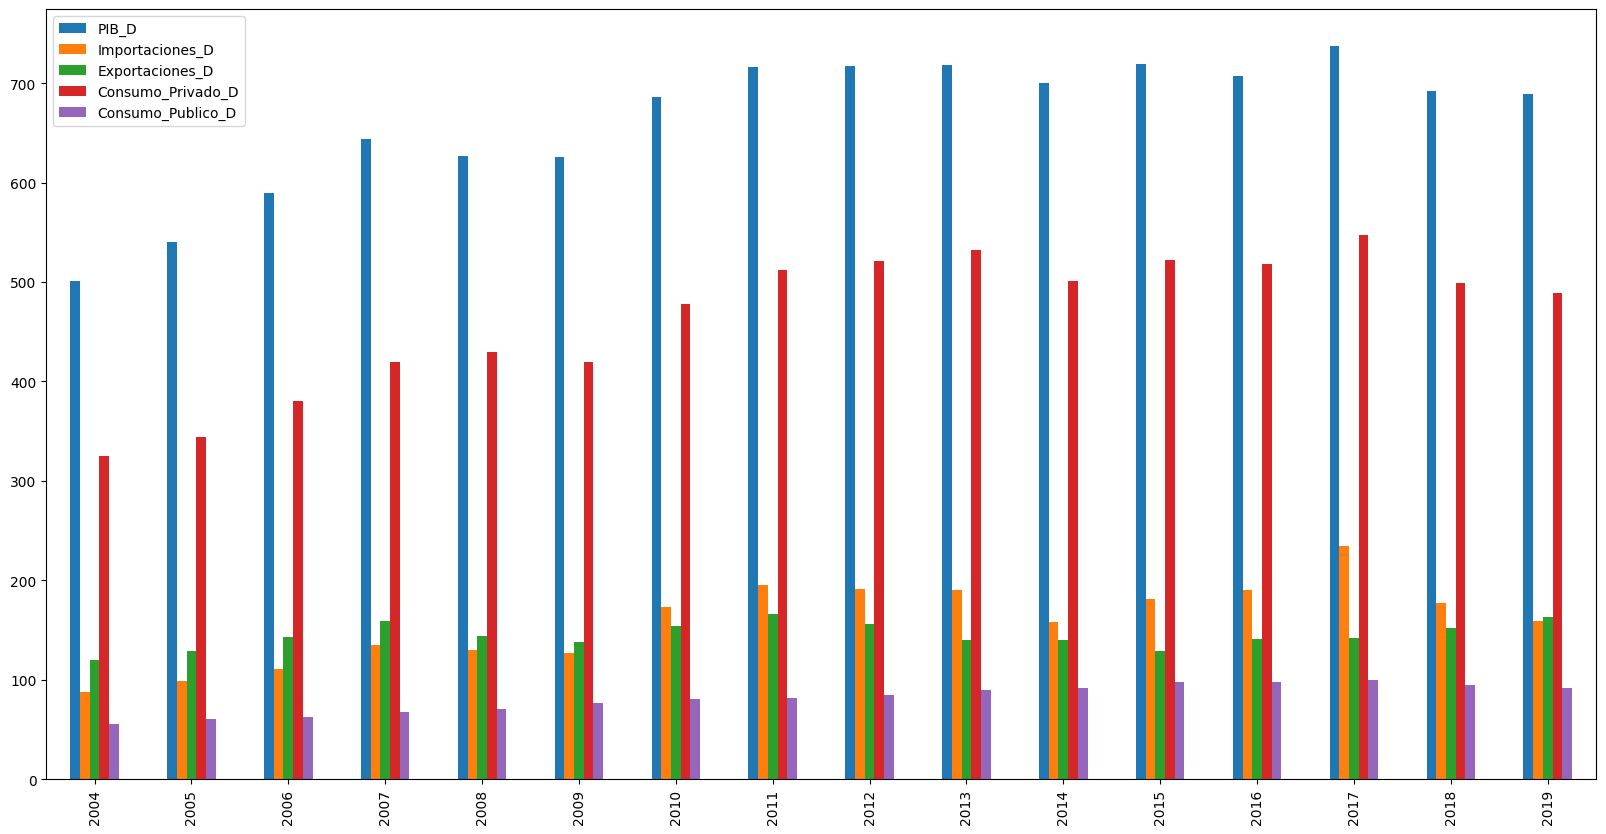

In [64]:
# Tomamos 1 trimestre por año
cols = ['Trimestre', 'PIB_D', 'Importaciones_D', 'Exportaciones_D', 'Consumo_Privado_D', 'Consumo_Publico_D']
# graficamos y especificamos un tamaño
df.loc[3::4, cols].plot(kind='bar', figsize=(20,10)) # loc[3::4, cols] son los cierres anuales para todas las columnas
labels = df['Año'].unique()
plt.xticks(range(0, labels.shape[0]), labels);

Grafico con plotly

 x la variable temporal, a y la variable cuantitativa, y a color la variable de la etiqueta

Pero la etiqueta son columnas en df, usemos melt para reconfigurar a lo largo y que se almacenen todas las etiquetas en una unica variable

In [65]:
# df para el ultimo trimestre del anio
# eliminamos Trimestre
df_iv = df.query("Trimestre == 'IV'").drop('Trimestre', axis=1)
df_iv.head()

,Año,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
3,2004,500.929,87.173,119.994,324.624,55.747
7,2005,540.395,98.234,128.397,343.914,60.675
11,2006,589.424,110.614,143.320,380.607,62.868
15,2007,643.565,134.672,158.949,419.284,67.538
19,2008,627.222,130.037,144.309,429.184,70.242


nos queda un dataframe sin los trimestres, y los valores de las variables son los del ultimo trimestre.

In [66]:
df_iv = df_iv.melt(
    id_vars = "Año",
    var_name= 'etiqueta',
    value_name= 'value'
)

In [67]:
df_iv

,Año,etiqueta,value
0,2004,PIB_D,500.929
1,2005,PIB_D,540.395
2,2006,PIB_D,589.424
3,2007,PIB_D,643.565
4,2008,PIB_D,627.222
...,...,...,...
75,2015,Consumo_Publico_D,97.209
76,2016,Consumo_Publico_D,97.746
77,2017,Consumo_Publico_D,99.659
78,2018,Consumo_Publico_D,94.536


Ya estamos en condiciones de graficar con plotly. Porque tenemos variables para el eje x, para el eje y. Tambien, variable para barcolor.

In [68]:
import plotly.express as px
import plotly.graph_objects as go
df_iv

px.line(df_iv,
        x = "Año",
        y = "value",
        color = "etiqueta",
        title = "Evolución del PBI",
        width =800, height = 400)

### 1.3
Graficar la serie de exportaciones junto a su media movil y su desvio estandar móvil.

In [69]:
import numpy as np

In [70]:
df.head()

,Año,Trimestre,PIB_D,Importaciones_D,Exportaciones_D,Consumo_Privado_D,Consumo_Publico_D
0,2004,I,475.774,76.726,110.908,301.075,52.471
1,2004,II,469.984,80.629,114.546,305.247,52.962
2,2004,III,493.773,82.344,117.306,317.382,54.495
3,2004,IV,500.929,87.173,119.994,324.624,55.747
4,2005,I,515.446,89.021,128.989,321.890,57.651


In [71]:
# Consejo: utilizar las funciones np.rolling

media_movil = df["Exportaciones_D"].rolling(4).mean() # media movil de los 4 periodos anteriores
desvio_movil = df["Exportaciones_D"].rolling(4).std() # desvio estandar movil de los 4 periodos anteriores



In [72]:
media_movil.sample(5)

,Exportaciones_D
20,147.61825
41,142.09875
54,144.43900
63,157.36100
62,154.68950


In [73]:
desvio_movil.sample(5)

,Exportaciones_D
2,NaN
15,7.365335
27,9.719368
45,4.098827
50,7.900993


grafico de evolucion de exportaciones de estas dos metricas.

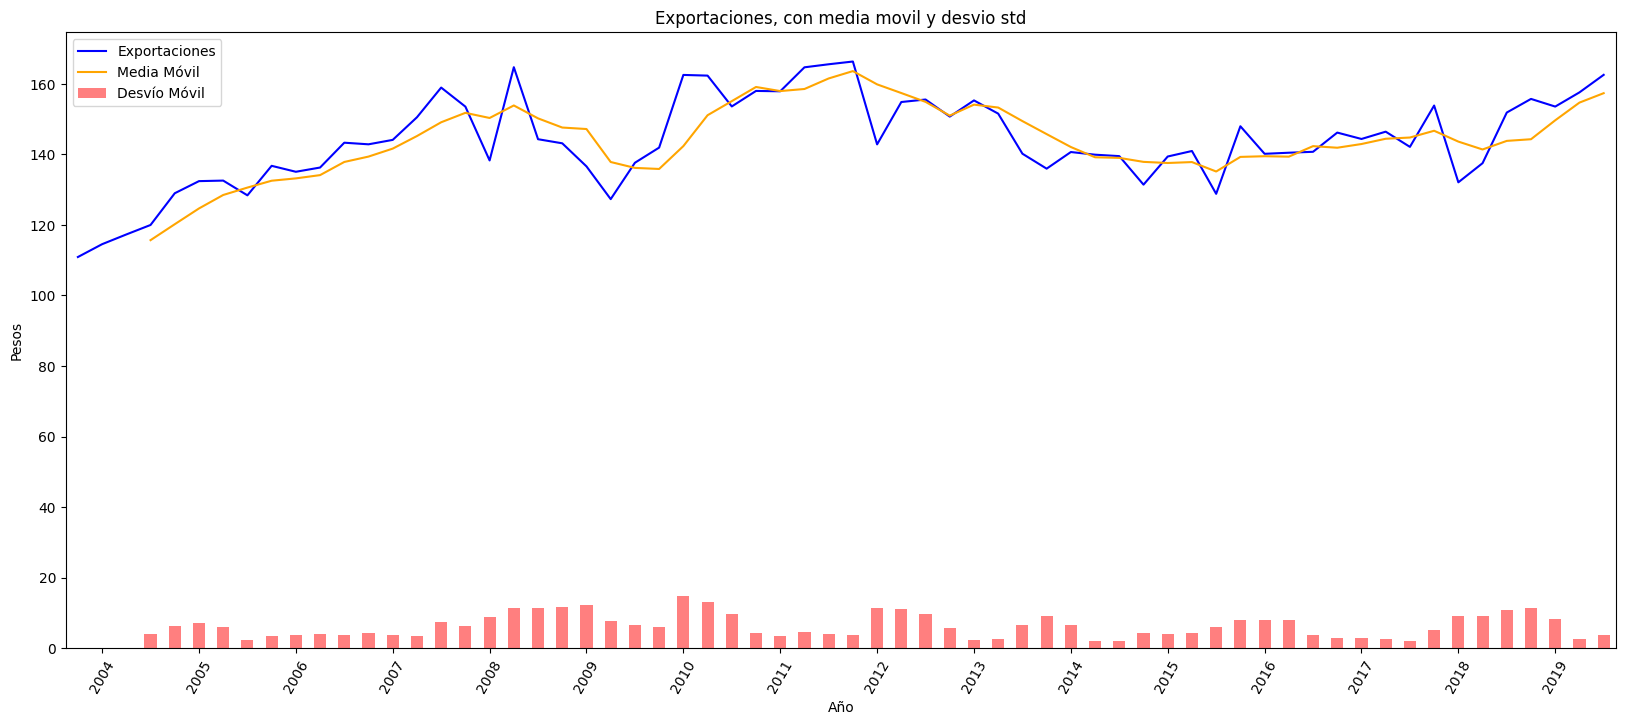

In [74]:
df["Exportaciones_D"].plot(figsize=(20,8), label='Exportaciones', color='blue') # grafico de lineas de exportaciones
media_movil.plot(label='Media Móvil', color='orange') # grafico de media movil
desvio_movil.plot(kind='bar', label='Desvío Móvil', color='red', alpha=0.5) # grafico de barras de std movil
plt.xticks(range(1,65,4), df['Año'].unique(), rotation=60)

# configuracion de labels
plt.xlabel('Año')
plt.ylabel('Pesos')
plt.title("Exportaciones, con media movil y desvio std")
plt.legend()


## 2. Iris Dataset

Utilizando el [Iris Dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), una base de datos que contiene información acerca de tres especies de flores distintas, vamos realizar algunos gráficos para entender mejor su comportamiento. Este dataset es ampliamente utilizado en el ámbito academico para la práctica de visualización de datos, es recomendable que investiguen y vean los distintos trabajos realizados sobre el mismo.

In [75]:
df = pd.read_csv("https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/5_Visualizacion/ejercicios/data_iris.csv")

In [76]:
df.shape

(150, 6)

In [77]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


sepal: pieza floral. Se midio largo y ancho
petalo: flor. Se midio largo y ancho.
especie

### 2.1
Graficar las distribución del largo del sepalo.

el largo del sepalo, es una variable numerica. Podemos analizar su distribucion de valores (frecuencia de valores del largo del sepalo) con un histograma.

Text(0.5, 1.0, 'Distribucion del largo del sepalo')

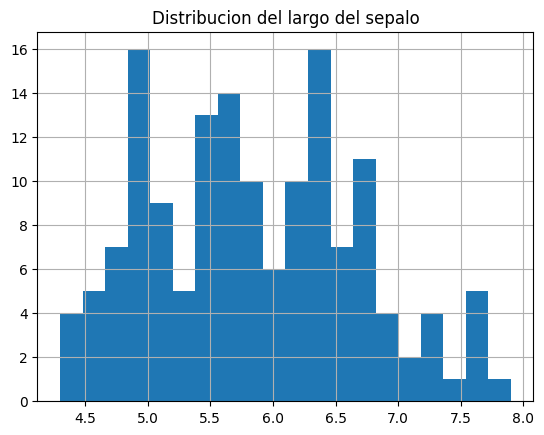

In [78]:
hist = df["SepalLengthCm"].hist(bins=20)
plt.title("Distribucion del largo del sepalo")

## 2.2
Graficar la función de densidad del largo del sépalo.

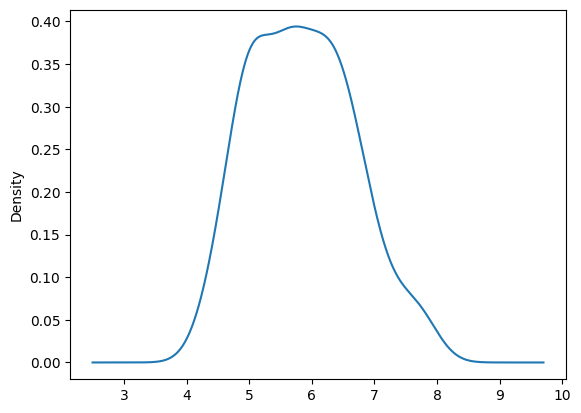

In [79]:
df["SepalLengthCm"].plot.density();

In [80]:
from scipy.stats import kstest
x = df['SepalLengthCm']
# normalizamos
norm = (x - x.mean())/x.std()
kstest(norm, 'norm')

KstestResult(statistic=0.08865361377316228, pvalue=0.17813737848592026, statistic_location=-0.8976738791967661, statistic_sign=1)

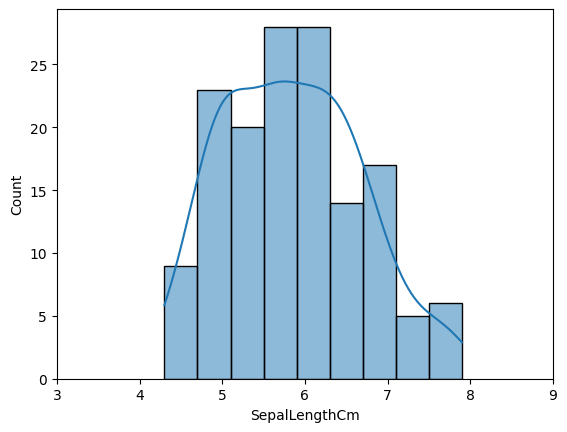

In [53]:
import seaborn as sns
sns.histplot(df['SepalLengthCm'], kde=True)
plt.xlim(3, 9);

## 3. Plotly

In [83]:
import plotly.graph_objects as go
import plotly.express as px

### 3.1

Con plotly express realizar un gráfico de dispersion donde el eje de ordenadas explique el largo del sepalo y el eje de abscisas explique el largo del pétalo con cada una de las especies.

In [85]:
# eje y: largo del sepalo / eje x: largo del petalo / colorbar: especies de iris
fig = px.scatter(df, x='PetalLengthCm', y= 'SepalLengthCm', color = 'Species', title='Correlacion Iris')
fig.show()

### 3.2
Realizar lo mismo que en el 3.1 pero con un *objeto gráfico* de plotly.

In [89]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica


In [94]:
# Especie versicolor
t1 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-versicolor'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-versicolor'],
                    mode='markers',
                    marker_color='rgb(140, 190, 20)',
                    marker_symbol='star-square',
                    name='versicolor')

# Especie setosa
t2 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-setosa'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-setosa'],
                    mode='markers',
                    marker_color='rgb(240, 90, 20)',
                    marker_symbol='star-triangle-up')

# Especies virginica
t3 = go.Scatter(x=df['PetalLengthCm'][df['Species'] == 'Iris-virginica'],
                    y=df['SepalLengthCm'][df['Species'] == 'Iris-virginica'],
                    mode='markers',
                    marker_color='rgb(40, 190, 100)',
                    marker_symbol='star-square')

In [95]:
fig = go.Figure([t1, t2, t3])
fig.show()

## Extra

### Visulización de imagenes

Utilizando una imagen que tengan guardada en su computadora, vamos a visualizarla.

In [100]:
import matplotlib.image as mpimg

img = mpimg.imread('/content/DSC09081.JPG')

In [101]:
print(img)

[[[160 165 171]
  [161 166 172]
  [161 166 172]
  ...
  [245 244 239]
  [245 244 239]
  [245 244 239]]

 [[161 166 172]
  [161 166 172]
  [162 167 173]
  ...
  [247 246 241]
  [247 246 241]
  [247 246 241]]

 [[162 167 173]
  [162 167 173]
  [162 167 173]
  ...
  [249 248 243]
  [250 249 244]
  [250 249 244]]

 ...

 [[131 143 157]
  [131 143 157]
  [131 143 157]
  ...
  [121 130 139]
  [112 123 129]
  [ 78  89  95]]

 [[130 142 156]
  [130 142 156]
  [131 143 157]
  ...
  [123 133 143]
  [121 131 140]
  [111 121 130]]

 [[130 142 156]
  [130 142 156]
  [131 143 157]
  ...
  [118 128 138]
  [117 130 138]
  [114 127 135]]]


Utilice la función plt.imshow para visualizar la imagen.

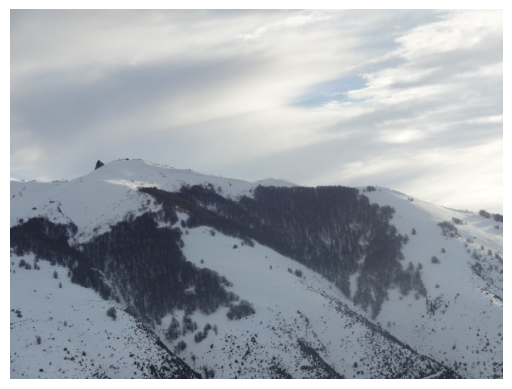

In [104]:
plt.imshow(img)
plt.axis(False); #eliminacion de ejes